In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
%matplotlib notebook

In [2]:
data = pd.read_csv('/tmp/dddd', sep=" ", header=None)
data.columns = ["Label", "ID", "x1Label", "x1", "x2Label", "x2", "FitnessLabel", "Fitness", "EnergyLabel", "Energy"]

In [3]:
data = data.drop(["x1Label", "EnergyLabel", "x2Label", "FitnessLabel"], axis=1)

In [4]:
data.head(12)

,Label,ID,x1,x2,Fitness,Energy
0,Agent,[0],367.589011,637.389175,-541386.0,40.0
1,Agent,[1],332.795298,431.081877,-296584.0,40.0
2,Agent,[2],769.877269,156.077593,-617071.0,40.0
3,Agent,[3],221.378390,327.405098,-156202.0,40.0
4,-,NaN,NaN,NaN,NaN,NaN
5,Agent,[3],221.378390,327.405098,-156202.0,60.0
6,Agent,[0],367.589011,637.389175,-541386.0,20.0
7,Agent,[1],332.795298,431.081877,-296584.0,60.0
8,Agent,[2],769.877269,156.077593,-617071.0,20.0
9,-,NaN,NaN,NaN,NaN,NaN


In [5]:
bestSolution = pd.DataFrame(columns=["iteration", "maxValue"])

iteration = 0
maxVal = -float('inf')
x1 = None
x2 = None
for index, row in data.iterrows():
    if row["Label"] == "-":
        bestSolution = bestSolution.append({"iteration": iteration, 
                                            "maxValue": maxVal,
                                            "x1": x1,
                                            "x2": x2}, ignore_index=True)
        maxVal = -float('inf')
        iteration += 1
    else:
        if row["Fitness"] > maxVal:
            maxVal = row["Fitness"]
            x1 = row["x1"]
            x2 = row["x2"]
            

NO_OF_ITERATIONS = len(bestSolution)

In [6]:
bestSolution

,iteration,maxValue,x1,x2
0,0.0,-156202.0,221.37839,327.405098
1,1.0,-156202.0,221.37839,327.405098
2,2.0,-156202.0,221.37839,327.405098
3,3.0,-156202.0,221.37839,327.405098
4,4.0,-156202.0,221.37839,327.405098
...,...,...,...,...
996,996.0,0.0,0.16584,0.656670
997,997.0,0.0,0.16584,0.656670
998,998.0,0.0,0.16584,0.656670
999,999.0,0.0,0.16584,0.656670


<IPython.core.display.Javascript object>


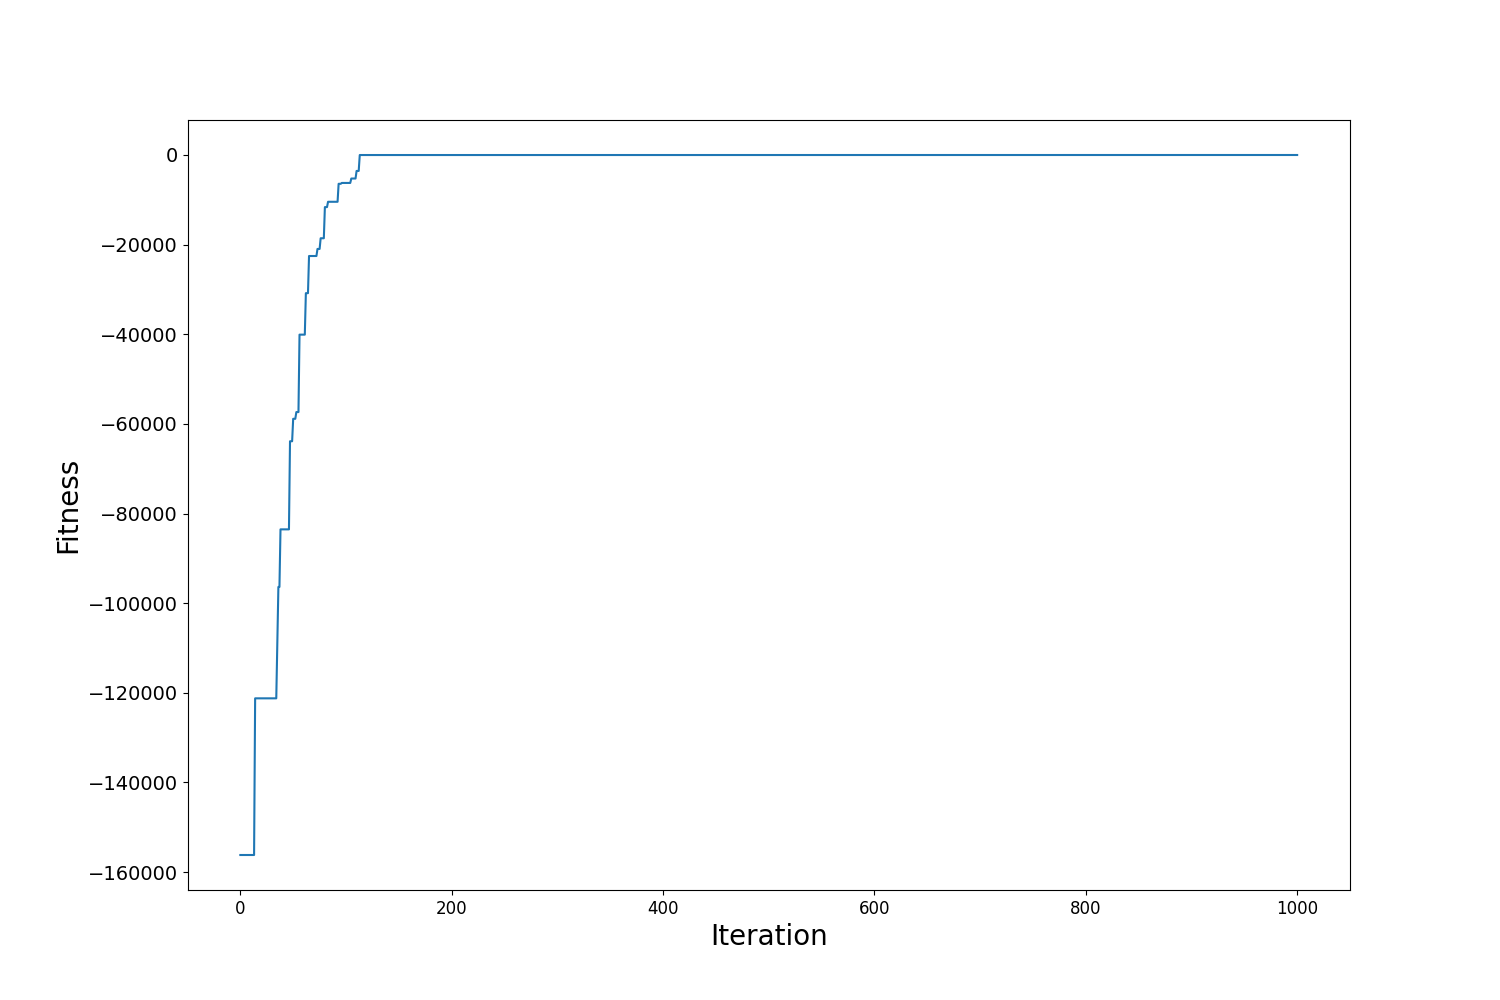

In [7]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Fitness',fontsize=20)

plt.plot(bestSolution["iteration"], bestSolution["maxValue"])

In [8]:
def animate_fitness(i):
    data = bestSolution["maxValue"].iloc[:int(i+1)].to_frame() #select data range
    p = sns.lineplot(x=data.index, y="maxValue", data=data, color="r")  
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

<IPython.core.display.Javascript object>


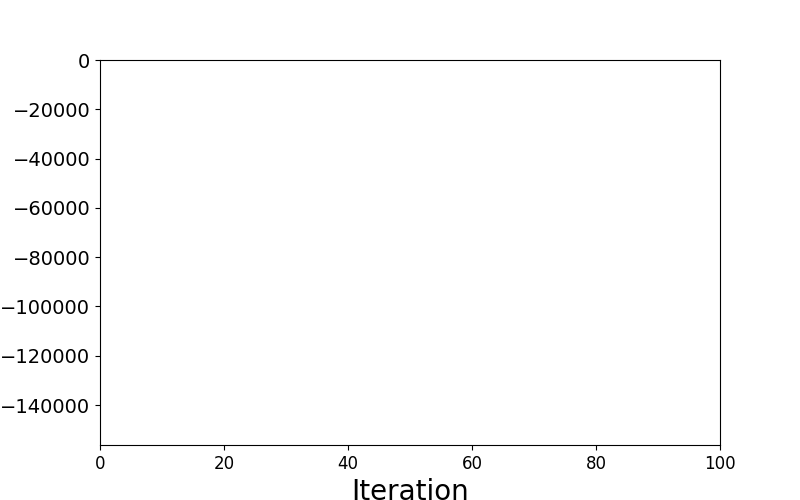

In [9]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

import numpy as np
fig = plt.figure(figsize=(8,5))
plt.xlim(0, 100)
plt.ylim(np.min(bestSolution["maxValue"]), np.max(bestSolution["maxValue"]))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Solution',fontsize=20)

ani = matplotlib.animation.FuncAnimation(fig, animate_fitness, frames=NO_OF_ITERATIONS, repeat=True)
plt.show()
# ani.save('Fitness.mp4', writer=writer)

<IPython.core.display.Javascript object>


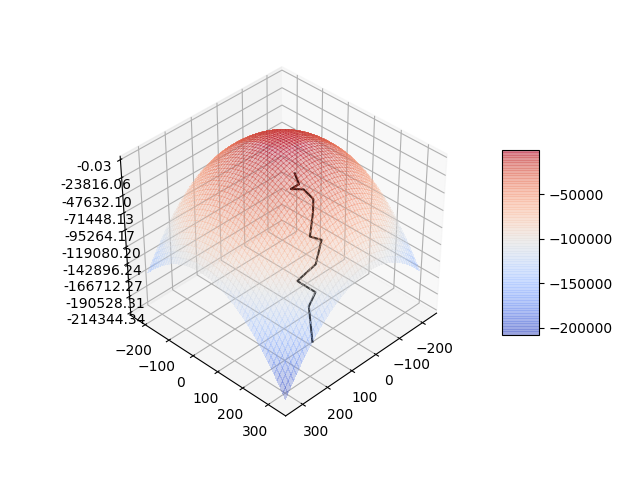

In [43]:
def update(num, data, line):
    line.set_color('black')
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-np.max(bestSolution["x1"]), np.max(bestSolution["x2"]), 0.25)
Y = np.arange(-np.max(bestSolution["x1"]), np.max(bestSolution["x2"]), 0.25)
X, Y = np.meshgrid(X, Y)
Z = -(X**2 + Y**2)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.3)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

data = np.array([bestSolution["x1"].to_numpy(),
                 bestSolution["x2"].to_numpy(),
                 bestSolution["maxValue"].to_numpy()])
# N = data.shape[1]
N = 100
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

ani = matplotlib.animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
ani.save('Solution.mp4', writer=writer)